### BHARAT INTERN 

### TASK-2 TITANIC CLASSIFICATION 

### SUBMITTED BY - Ashmika Dwivedi

## Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [31]:
df = pd.read_csv("C://Users//ashmi//Downloads//titanic//train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [34]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Cleaning 

In [35]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
# dropping the "Cabin" column from the dataframe
df = df.drop(columns='Cabin', axis=1)

In [37]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [38]:
# finding the mode value of "Embarked" column
# replacing the missing values in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [39]:
# checking the number of missing values in each column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Label Encoding 

In [40]:
#label encoding
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Apply label encoding to categorical columns
categorical_columns = ['Embarked', 'Sex']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
# Print the updated dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


### Data Visualization

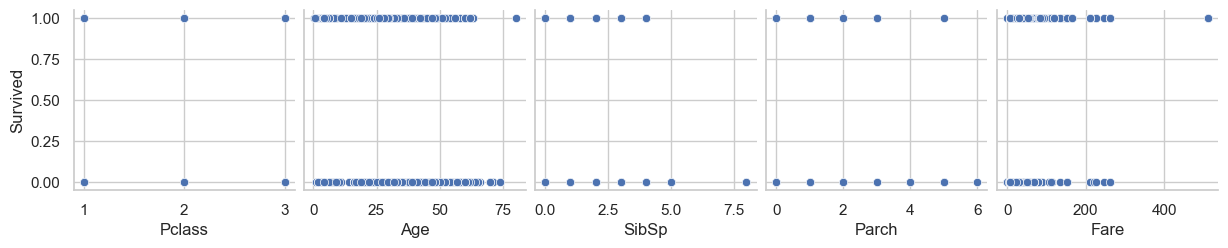

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the style of seaborn
sns.set(style="whitegrid")
# Pairwise scatter plots for numerical variables
numerical_columns = ['Pclass','Age','SibSp','Parch','Fare']
sns.pairplot(df, x_vars=numerical_columns, y_vars='Survived', kind='scatter')
plt.show()


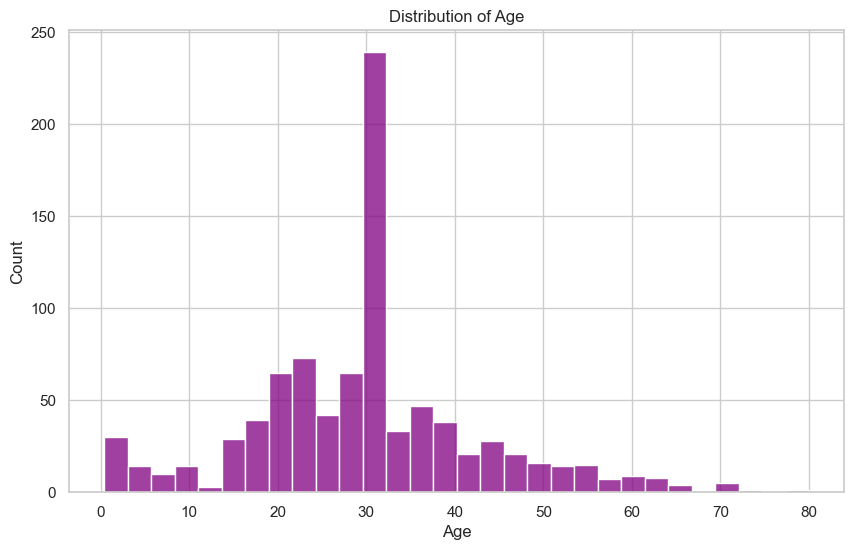

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Age'].dropna(), kde=False, color='purple', bins=30)
plt.title('Distribution of Age')
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

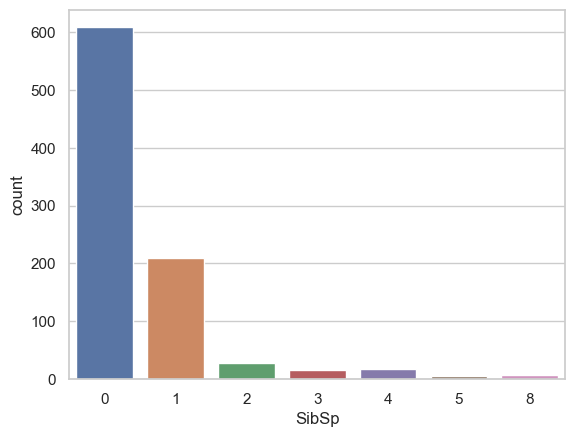

In [98]:
sns.countplot(x='SibSp',data=df)

<Axes: xlabel='Survived', ylabel='count'>

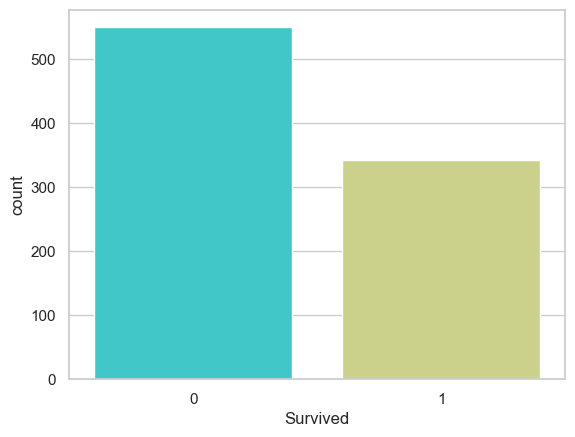

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

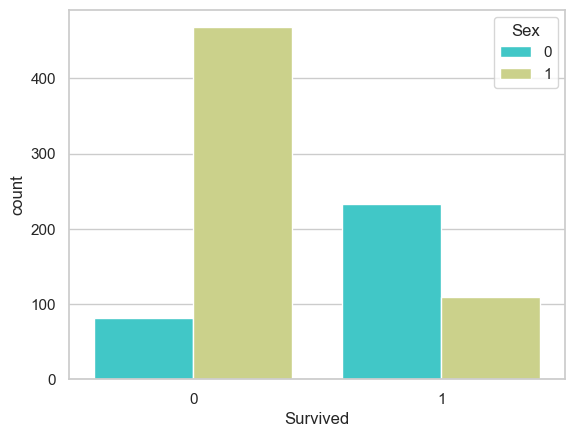

In [100]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')

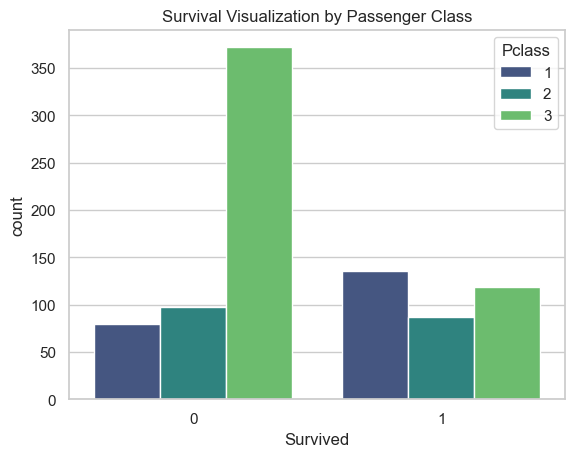

In [101]:
# plot of survival based on passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df, palette='viridis')
plt.title('Survival Visualization by Passenger Class')
plt.show()

<Axes: xlabel='Embarked', ylabel='Survived'>

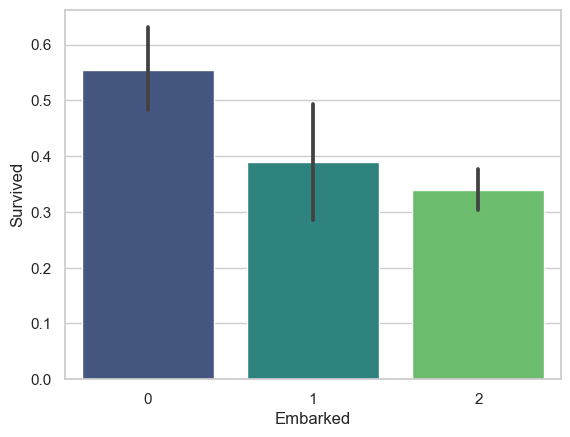

In [103]:
sns.barplot(x=df['Embarked'],y=df['Survived'],palette='viridis')

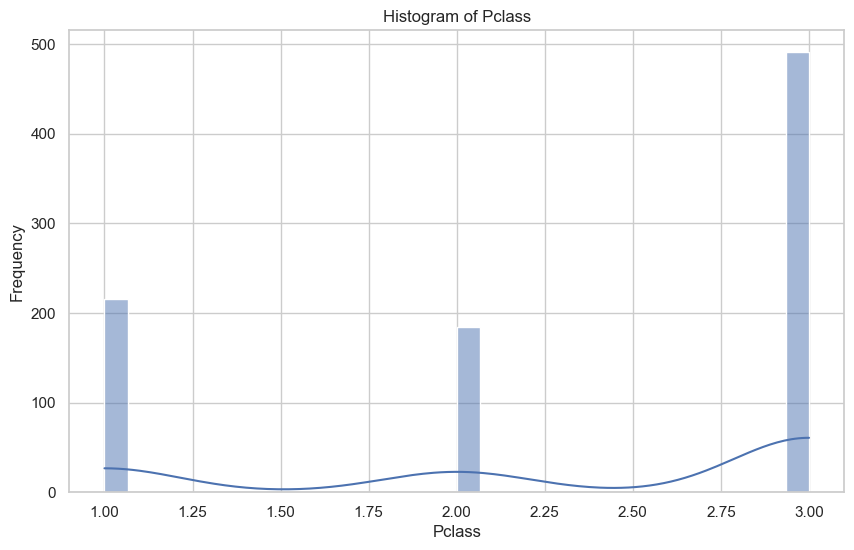

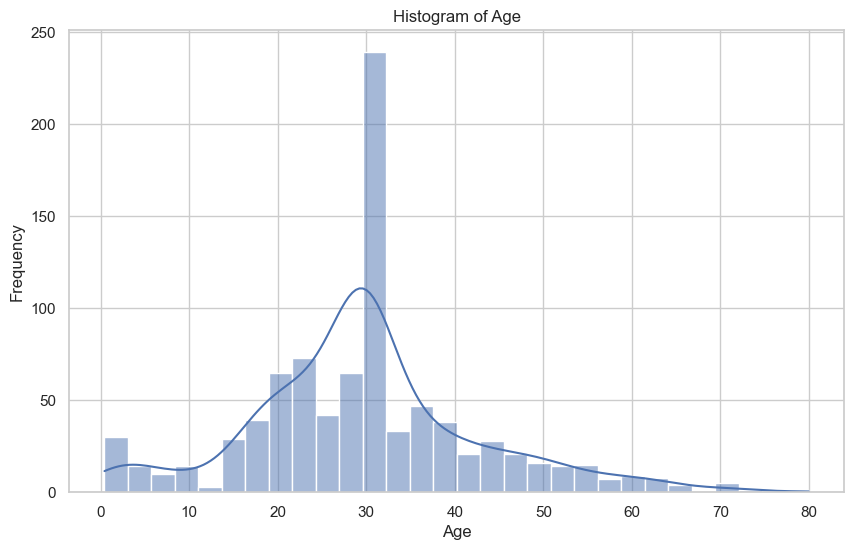

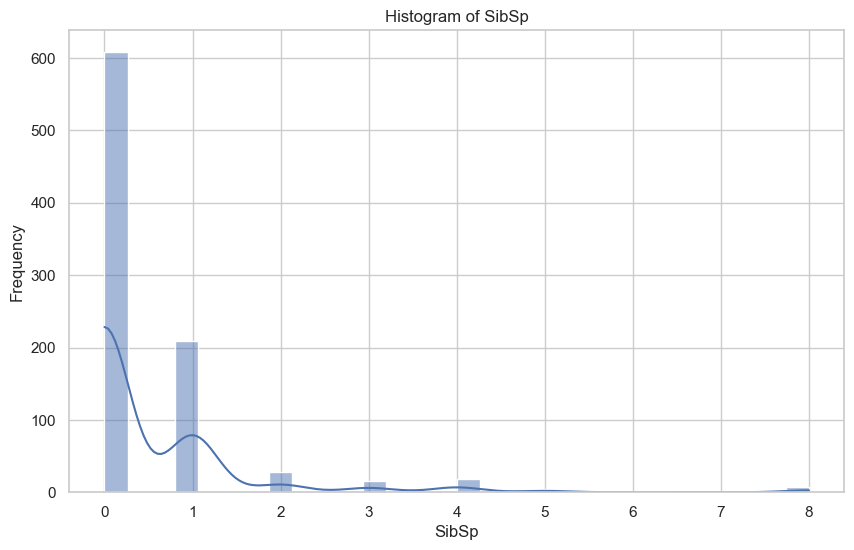

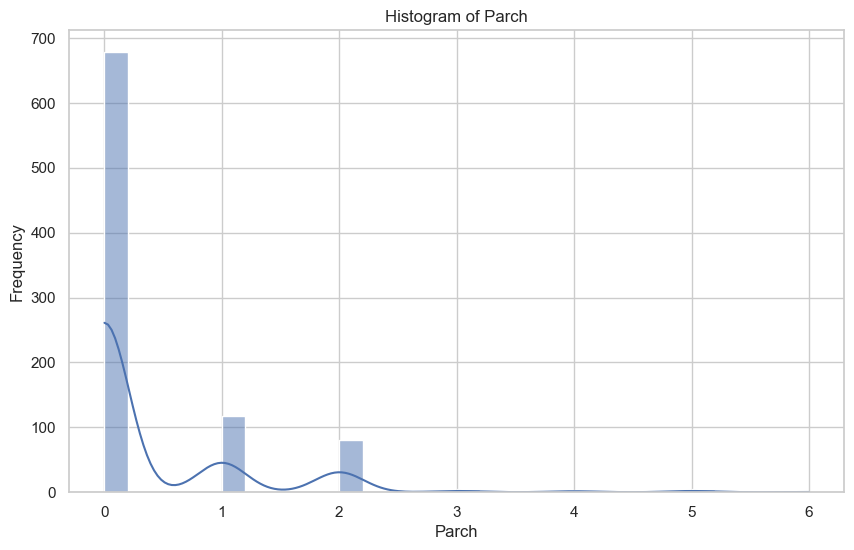

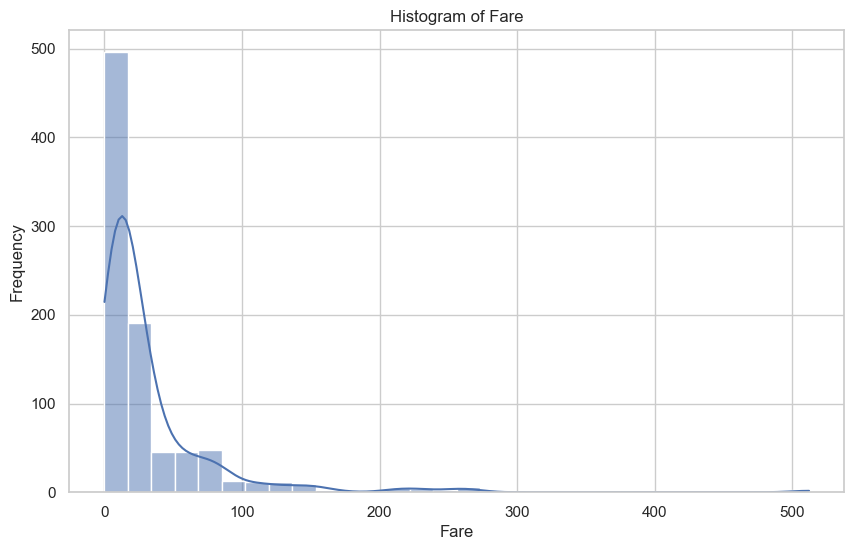

In [43]:
# Histograms of other numerical features
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, bins=30, kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


### Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Survived', 'Name','Ticket'], axis=1),
    df['Survived'],
    test_size=0.1,
    random_state=101
)

### Building Logistic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Training and Predicting

In [59]:
predictions = logmodel.predict(X_test)
X_test.head()
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1], dtype=int64)

### Evaluation

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[45  6]
 [12 27]]


In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.82      0.69      0.75        39

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90



In [91]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8


### Decision Tree Classification

In [62]:

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

In [63]:
print(confusion_matrix(y_test,dt_pred))

[[45  6]
 [14 25]]


In [64]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        51
           1       0.81      0.64      0.71        39

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.77        90
weighted avg       0.78      0.78      0.77        90



In [90]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(y_test,dt_pred)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7777777777777778


### Random Forest Classification

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [66]:
rf_pre=rf.predict(X_test)
print(confusion_matrix(y_test,rf_pre))

[[47  4]
 [14 25]]


In [67]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        51
           1       0.86      0.64      0.74        39

    accuracy                           0.80        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.81      0.80      0.79        90



In [89]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(y_test,rf_pre)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8


### XGBoosts Classifier

In [71]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
xg_pred = xgboost.predict(X_test)
print(confusion_matrix(y_test,xg_pred))

[[43  8]
 [15 24]]


In [73]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        51
           1       0.75      0.62      0.68        39

    accuracy                           0.74        90
   macro avg       0.75      0.73      0.73        90
weighted avg       0.75      0.74      0.74        90



In [92]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(y_test,xg_pred)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7444444444444445


### ANN

In [74]:
#Building an ANN Network
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [81]:
ann = Sequential()
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=8))
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
ann.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
26/26 [==============================] - 2s 4ms/step - loss: 0.6640 - accuracy: 0.6167
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.6617
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.6467
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.6219 - accuracy: 0.6629
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 0.6141 - accuracy: 0.6792
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.6046 - accuracy: 0.6792
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 0.6099 - accuracy: 0.6742
Epoch 8/10
26/26 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.6754
Epoch 9/10
26/26 [==============================] - 0s 4ms/step - loss: 0.6153 - accuracy: 0.6667
Epoch 10/10
26/26 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.6841


In [83]:
ann_pred = ann.predict(X_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)


3/3 [==============================] - 1s 5ms/step
[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]


In [84]:
print(confusion_matrix(y_test,ann_pred))

[[45  6]
 [23 16]]


In [85]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.66      0.88      0.76        51
           1       0.73      0.41      0.52        39

    accuracy                           0.68        90
   macro avg       0.69      0.65      0.64        90
weighted avg       0.69      0.68      0.66        90



In [93]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(y_test,ann_pred)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.6777777777777778
